In [17]:
import zipfile
import pandas as pd
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Path to your zip
zip_path = r"C:\Users\minha\Downloads\archive (2).zip"

images = []
labels = []

with zipfile.ZipFile(zip_path, 'r') as z:
    # Read CSV directly from zip
    with z.open("Train.csv") as f:  # <-- yahan Train.csv hona zaroori hai
        df = pd.read_csv(f)
    
    for i, row in df.iterrows():
        img_path = row['Path']  # Path column me image ka folder+name hota hai
        class_id = int(row['ClassId'])

        img_data = z.read(img_path)  # read image bytes
        img_array = np.frombuffer(img_data, np.uint8)
        img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (32, 32))
        images.append(img)
        labels.append(class_id)

# Convert to arrays
images = np.array(images) / 255.0
labels = to_categorical(np.array(labels), 43)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (31367, 32, 32, 3) (31367, 43)
Test shape: (7842, 32, 32, 3) (7842, 43)


In [12]:
import zipfile
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
import os

zip_path = r"C:\Users\minha\Downloads\archive (2).zip"
images = []
labels = []

with zipfile.ZipFile(zip_path, 'r') as z:
    for file in z.namelist():
        # skip non-image files or folders
        if file.endswith(('.ppm', '.png', '.jpg')):
            # class_id = folder name (first folder in path)
            parts = file.split('/')
            if parts[0].isdigit():  # folder name should be a number
                class_id = int(parts[0])
            else:
                continue  # skip Meta or other folders

            img_data = z.read(file)
            img_array = np.frombuffer(img_data, np.uint8)
            img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
            img = cv2.resize(img, (32,32))
            images.append(img)
            labels.append(class_id)

images = np.array(images)/255.0
labels = to_categorical(np.array(labels), 43)


In [13]:

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [18]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

datagen.fit(X_train)


In [19]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(43, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\minha\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │          11,051 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,627 (920.42 KB)

 Trainable params: 235,627 (920.42 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=64), 
                    epochs=15, 
                    validation_data=(X_test, y_test))


C:\Users\minha\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 159s 302ms/step - accuracy: 0.2896 - loss: 2.5017 - val_accuracy: 0.5881 - val_loss: 1.3214
Epoch 2/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 163s 332ms/step - accuracy: 0.6353 - loss: 1.1055 - val_accuracy: 0.8497 - val_loss: 0.4728
Epoch 3/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 156s 317ms/step - accuracy: 0.7937 - loss: 0.6328 - val_accuracy: 0.9199 - val_loss: 0.2821
Epoch 4/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 158s 323ms/step - accuracy: 0.8665 - loss: 0.4093 - val_accuracy: 0.9578 - val_loss: 0.1595
Epoch 5/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 153s 312ms/step - accuracy: 0.9045 - loss: 0.3072 - val_accuracy: 0.9736 - val_loss: 0.1057
Epoch 6/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 151s 307ms/step - accuracy: 0.9278 - loss: 0.2327 - val_accuracy: 0.9767 - val_loss: 0.0985
Epoch 7/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 151s 307ms/step - accuracy: 0.9407 - loss: 0.1914 - val_accuracy: 0.9819 - val_loss: 0.0639
Epoch 8/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 149s 304ms/step - accuracy: 0.9488 -

246/246 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9917 - loss: 0.0288
Test Accuracy: 0.9917113184928894
246/246 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step


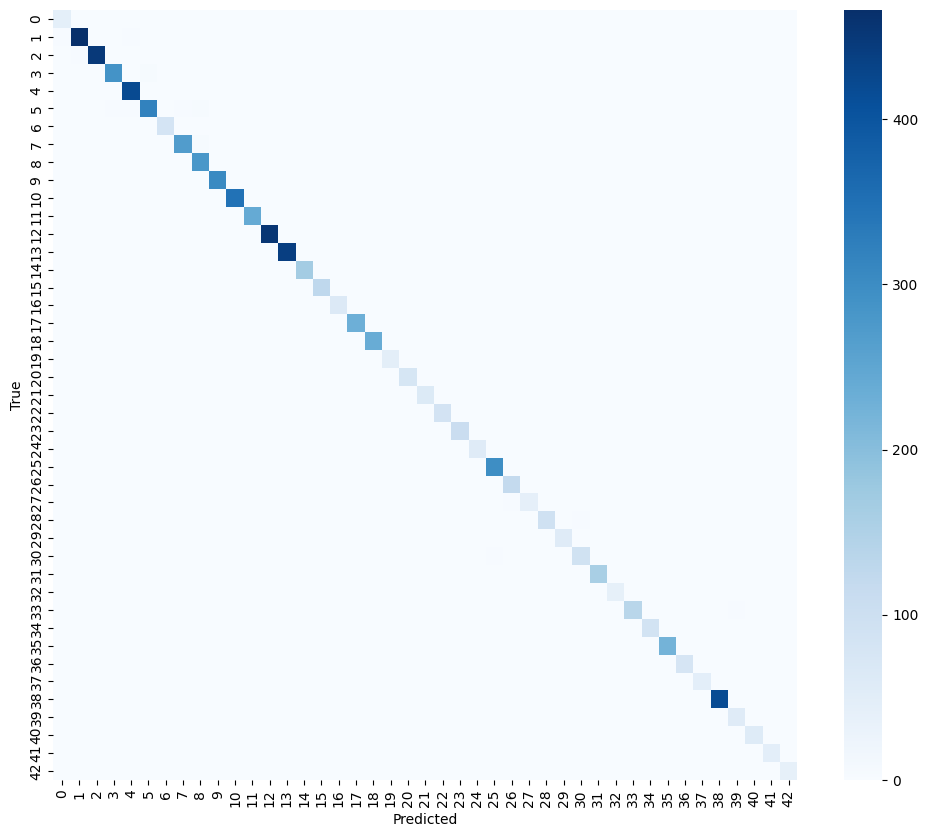

In [21]:
# Accuracy
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=False, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [15]:
import zipfile

zip_path = r"C:\Users\minha\Downloads\archive (2).zip"

with zipfile.ZipFile(zip_path, 'r') as z:
    files = z.namelist()
    for f in files[:50]:  # pehle 50 file paths print karna
        print(f)


Meta.csv
Meta/.~lock.ClassesInformation.ods#
Meta/.~lock.ClassesInformationStrong.ods#
Meta/0.png
Meta/1.png
Meta/10.png
Meta/11.png
Meta/12.png
Meta/13.png
Meta/14.png
Meta/15.png
Meta/16.png
Meta/17.png
Meta/18.png
Meta/19.png
Meta/2.png
Meta/20.png
Meta/21.png
Meta/22.png
Meta/23.png
Meta/24.png
Meta/25.png
Meta/26.png
Meta/27.png
Meta/28.png
Meta/29.png
Meta/3.png
Meta/30.png
Meta/31.png
Meta/32.png
Meta/33.png
Meta/34.png
Meta/35.png
Meta/36.png
Meta/37.png
Meta/38.png
Meta/39.png
Meta/4.png
Meta/40.png
Meta/41.png
Meta/42.png
Meta/5.png
Meta/6.png
Meta/7.png
Meta/8.png
Meta/9.png
Test.csv
Test/00000.png
Test/00001.png
Test/00002.png
